### MLAP Midterm Exam - Key

In [2]:
import pandas as pd
import numpy as np

# importing the dataset

In [3]:
# making dataframe from CSV files
advertising_df= pd.read_csv(r"C:\Users\Home\Desktop\MLAP - Getting Started with Python\MLAP MT 10 Aug 2020 - Part - B\Advertising.csv")

# information of dataset procurred

In [6]:
advertising_df.info()
# datatype and missing values and the numbers of data collected stated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [7]:
advertising_df.head(10)
# the first 10 rows shown

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6
5,6,8.7,48.9,75.0,Weekdays,5.9
6,7,57.5,32.8,23.5,Weekdays,14.4
7,8,120.2,19.6,11.6,Weekdays,6.6
8,9,8.6,2.1,1.0,Weekdays,19.6
9,10,199.8,2.6,21.2,Weekdays,13.4


In [8]:
# advertising_df ("TV")= pd.to_numeric(advertising_df["TV"] , error = 'coerce')

# when we want to change the dataset to numeric

In [12]:
advertising_df.shape

# 200 entries
# 6 columns

(200, 6)

# missing values and deleting null rows

In [13]:
advertising_df.isna().sum()

Sno          0
TV           1
Radio        1
Newspaper    1
Day          3
Sales        0
dtype: int64

In [14]:
advertising_df=advertising_df.dropna()

In [15]:
advertising_df.isna().sum()

Sno          0
TV           0
Radio        0
Newspaper    0
Day          0
Sales        0
dtype: int64

In [16]:
advertising_df.info()

# 3 rows were missing so we deleted them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


# encode categorical variables

In [17]:
advertising_df.describe()

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [18]:
advertising_df[["TV", "Radio", "Newspaper", "Sales"]]. describe()

# only imporatant metric variables described

,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,14.102030
std,85.439138,14.922793,20.972370,5.192302
min,0.700000,0.000000,0.300000,1.600000
25%,74.700000,9.900000,12.900000,10.400000
50%,149.700000,22.300000,25.900000,12.900000
75%,218.400000,36.500000,45.100000,17.400000
max,296.400000,49.600000,100.900000,27.000000


In [19]:
x_features=["TV", "Radio", "Newspaper", "Day"]

In [21]:
advertising_df["Day"].unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [22]:
pd.get_dummies(advertising_df["Day"])[0:5]

#holiday is reference

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [23]:
categorical_features = ["Day"]

In [24]:
advertising_df_encoded=pd.get_dummies(advertising_df[x_features],
 columns = categorical_features,
  drop_first = True) #N-1

In [25]:
advertising_df_encoded

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
0,230.1,37.8,69.2,0,1
1,44.5,39.3,45.1,1,0
2,17.2,45.9,69.3,1,0
3,151.5,41.3,58.5,1,0
4,180.8,10.8,58.4,1,0
...,...,...,...,...,...
195,38.2,3.7,13.8,1,0
196,94.2,4.9,8.1,1,0
197,177.0,9.3,6.4,1,0
198,283.6,42.0,66.2,0,0


In [26]:
advertising_df_encoded.columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

In [27]:
import matplotlib.pyplot as plt
import seaborn as sn

In [30]:
day_sales_df = advertising_df.groupby("Day")["Sales"].mean().reset_index()

In [31]:
day_sales_df

,Day,Sales
0,Holiday,13.175000
1,Weekdays,14.033113
2,Weekend,14.438095


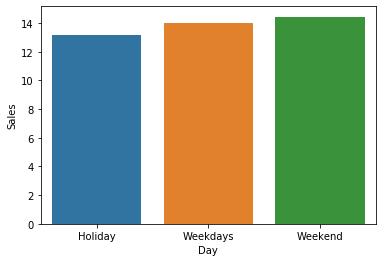

In [32]:
sn.barplot(y="Sales",
          x="Day",
          data=day_sales_df,
          order = day_sales_df.sort_values("Sales")["Day"])

(array([ 1.,  9., 20., 46., 34., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <a list of 10 Patch objects>)

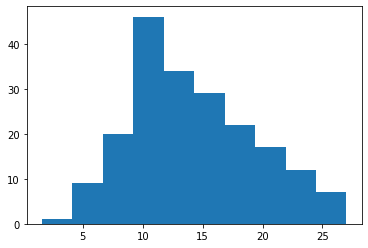

In [39]:
plt.hist(advertising_df.Sales)

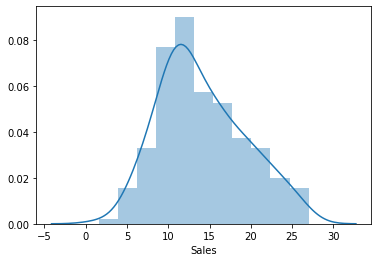

In [40]:
sn.distplot(advertising_df.Sales)

(array([26., 15., 20., 18., 19., 17., 22., 26., 19., 15.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <a list of 10 Patch objects>)

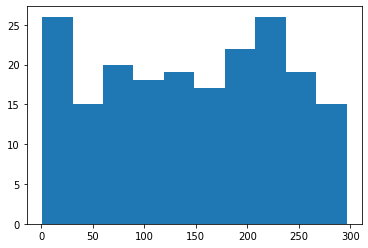

In [41]:
plt.hist(advertising_df.TV)

(array([30., 20., 21., 17., 18., 21., 14., 20., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <a list of 10 Patch objects>)

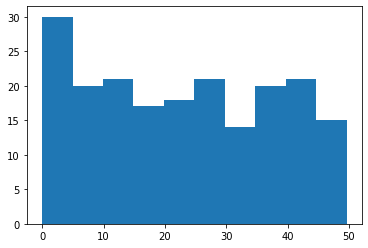

In [42]:
plt.hist(advertising_df.Radio)

(array([42., 32., 36., 29., 23., 18.,  7.,  7.,  2.,  1.]),
 array([  0.3 ,  10.36,  20.42,  30.48,  40.54,  50.6 ,  60.66,  70.72,
         80.78,  90.84, 100.9 ]),
 <a list of 10 Patch objects>)

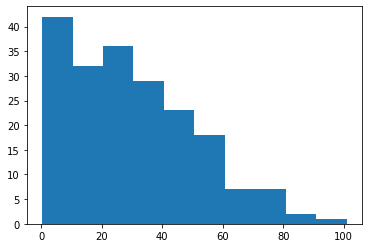

In [43]:
plt.hist(advertising_df.Newspaper)

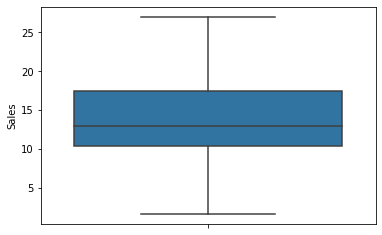

In [44]:
sn.boxplot(y=advertising_df.Sales)

Text(0.5, 1.0, 'BOX PLOT FOR DAY TYPES')

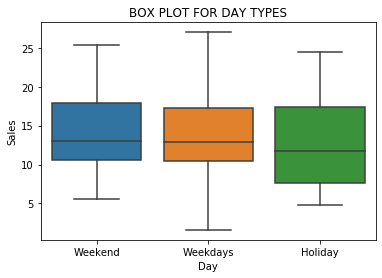

In [45]:
sn.boxplot(x=advertising_df.Day,
    y=advertising_df.Sales,
          order = advertising_df.Day.unique().sort())
plt.title("BOX PLOT FOR DAY TYPES")

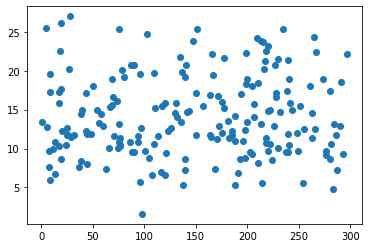

In [46]:
plt.scatter(advertising_df.TV, advertising_df.Sales)

In [47]:
advertising_df_correl = advertising_df[["TV", "Radio", "Newspaper", "Sales"]]

In [48]:
advertising_df_correl

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,10.1
1,44.5,39.3,45.1,8.0
2,17.2,45.9,69.3,10.3
3,151.5,41.3,58.5,25.4
4,180.8,10.8,58.4,13.6
...,...,...,...,...
195,38.2,3.7,13.8,8.4
196,94.2,4.9,8.1,10.8
197,177.0,9.3,6.4,15.2
198,283.6,42.0,66.2,4.8


In [49]:
advertising_df_correl.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.055658,0.095794,0.047781
Radio,0.055658,1.000000,0.356668,0.001630
Newspaper,0.095794,0.356668,1.000000,-0.027103
Sales,0.047781,0.001630,-0.027103,1.000000


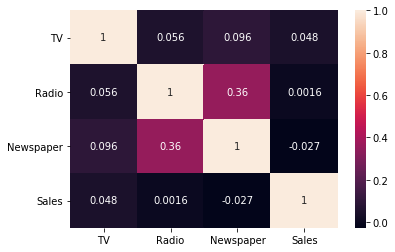

In [50]:
sn.heatmap(advertising_df_correl.corr(), annot=True)

In [51]:
x_features = advertising_df_encoded.columns

In [55]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [59]:
x = sm.add_constant(advertising_df_encoded)
y = advertising_df["Sales"]
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size = 0.7,random_state = 87)

In [60]:
advertising_df_model_1 = sm.OLS(train_y, train_x).fit()
advertising_df_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.009  
Dependent Variable: Sales            AIC:                843.3373
Date:               2020-08-15 15:10 BIC:                860.8572
No. Observations:   137              Log-Likelihood:     -415.67 
Df Model:           5                F-statistic:        0.7536  
Df Residuals:       131              Prob (F-statistic): 0.585   
R-squared:          0.028            Scale:              26.445  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          9.3158    3.6073   2.5824  0.0109   2.1796  16.4520
TV             0.0027    0.0072   0.3752  0.7082  -0.0116   0.0170
Radio          0.0044    0.0315   0.1393  0.8894  -0.0580   0.0668
Newspaper     -0.0166    0.0224  -0.7409  0.4601  -0.0610   0.0278
Day_Weekdays   4.8040    3.1830   1.5093  0.1336  -1.4928  11.1008
Day_Weekend    5.3015    3.1354   1.6908  0.0932  -0.9011  11.5042
-----------------------------------------------------------------
Omnibus:              6.007        Durbin-Watson:           1.906
Prob(Omnibus):        0.050        Jarque-Bera (JB):        5.512
Skew:                 0.424        Prob(JB):                0.064
Kurtosis:             2.502        Condition No.:           2133 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

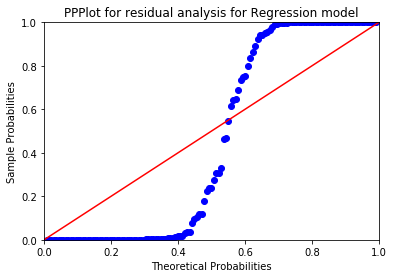

In [64]:
#Libraries are already imported 
probPlot = sm.ProbPlot(advertising_df_model_1.resid); 
# Returns Residual ie difference between observed and fitted values.
probPlot.ppplot(line='45');                # Sets the Normal line to 45 degree 
plt.title("PPPlot for residual analysis for Regression model") #Sets the title of Graph 
plt.show() #Used to show Plot Residual vs Normal Distribution

In [65]:
def getStandVals( vals ):          #Defining Function to calculate Std Values    
    return (vals - vals.mean())/vals.std()

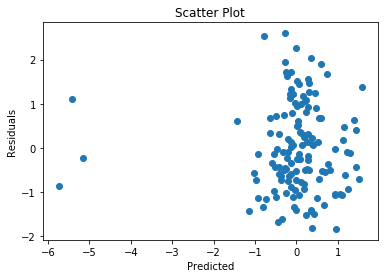

In [66]:
plt.scatter(getStandVals(advertising_df_model_1.fittedvalues),getStandVals(advertising_df_model_1.resid)) 
#Generate Scatter plt errors vs prediction 
plt.title("Scatter Plot") #Set title
plt.xlabel("Predicted")   #X-Axis Title 
plt.ylabel("Residuals")   #Y-Axis Title 
plt.show()                #Show Graph

In [67]:
from scipy.stats import zscore

In [69]:
advertising_df["z_score_sales"] = zscore(advertising_df.Sales)

In [71]:
advertising_df[(advertising_df.z_score_sales>3.0)|(advertising_df.z_score_sales<-3)]

,Sno,TV,Radio,Newspaper,Day,Sales,z_score_sales


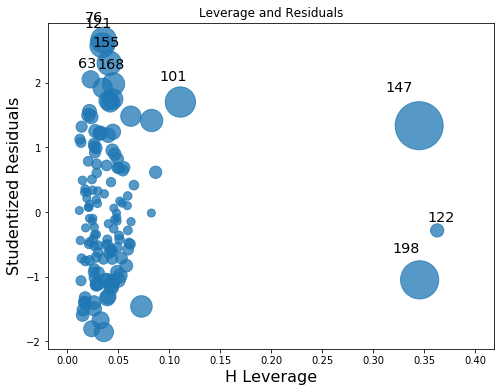

In [72]:
from statsmodels.graphics.regressionplots import influence_plot 
#impoting package 
fig, ax = plt.subplots( figsize=(8,6) )   #Set the size 
influence_plot( advertising_df_model_1, ax = ax )    #making influence plot 
plt.title( "Leverage and Residuals")      #Setting title 
plt.show();     

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


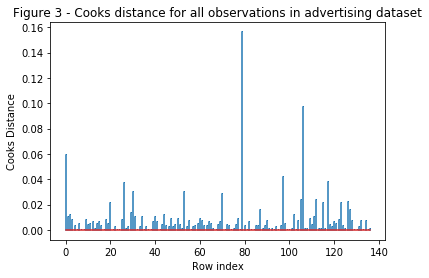

In [75]:

import numpy as np 
ad_influence = advertising_df_model_1.get_influence() 
(c, p) = ad_influence.cooks_distance 
plt.stem( np.arange( len( train_x) ), np.round( c, 3 ), markerfmt="," );
plt.title( "Figure 3 - Cooks distance for all observations in advertising dataset" );
plt.xlabel( "Row index") 
plt.ylabel( "Cooks Distance"); 

In [76]:
pred_y = np.power(advertising_df_model_1.predict(test_x[train_x.columns]),2)

In [78]:
from sklearn import metrics


np.sqrt(metrics.mean_squared_error(pred_y, test_y))

189.39248519324147

In [79]:
# sales = beta0 + beta1(tv)+ beta2(radio)+beta3(newpaper)+ beta4(day_weekdays)+ beta5(day_weekend)